In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns


In [2]:
df = pd.read_csv("adult.csv")

In [3]:
profile = ProfileReport(df)

# EDA


In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

So as from the profile report we can observe that.. there are no missing values, there are 6 numerical and 9 categorical varaibles. Also there are 23 duplicate entries.. which we need to drop. Also the capital gain and capital loss columns have 91 and 95 percent of the values as 0. So we can drop those two columns. Also the country and the workclass column has some garbage entries in the form of '?' , which accounts for 583 and 1836 entries respectively.

In [5]:
question_mark = set()
for i in range(32561):
    for j in range(15):
        if df.iloc[i][j] == " ?":
            question_mark.add(df.index[i])

In [6]:
len(question_mark)

2399

Now as we have got the indexes of the places where ? is present. So now we can drop those entries.

In [7]:
df.drop(index=question_mark , inplace = True)

In [8]:
df.reset_index(drop=True , inplace=True)

In [9]:
df.shape

(30162, 15)

In [10]:
for i in df.columns:
    print("Unique categories in {} feature is:\n{}\n\n".format(i , df[i].unique()))

Unique categories in age feature is:
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]


Unique categories in workclass feature is:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


Unique categories in fnlwgt feature is:
[ 77516  83311 215646 ...  84661 257302 201490]


Unique categories in education feature is:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


Unique categories in education-num feature is:
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


Unique categories in marital-status feature is:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed

As earlier in the pandas profile report we saw that thier were 23 duplicate entries. So we need to drop those values.

In [11]:
  df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Now as per the pandas profile report we observed that in capital gain and capital loss column almost 90% of the values are 0. Here we have two ways , either we can replace the 0 with some values or we can drop those columns. If we go by the first option ,then we will have to replace more than 25K values , which is not a vice option. So we will drop those columns.

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [13]:
df.drop(['capital-loss' ,'capital-gain'] , axis = 1 , inplace = True)

In [14]:
num_var = [features for features in df.columns if df[features].dtype != 'O']

In [15]:
cat_var = [features for features in df.columns if df[features].dtype == 'O']

Now we have to convert all the categorical features to numerical ones.

In [16]:
df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [17]:
df.replace({' Male':0 , ' Female':1} , inplace = True)

In [18]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
df.replace({' <=50K':0 , ' >50K':1} , inplace = True)

In [20]:
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
north_america = [' United-States' , ' Canada' , ' Outlying-US(Guam-USVI-etc)' , ' Mexico' , ' Cuba' , ' Jamaica' , ' Dominican-Republic' , ' El-Salvador' , ' Puerto-Rico' , ' Honduras',' Haiti' , ' Guatemala' , ' Nicaragua']

In [22]:
south_america =[' Columbia' ,  ' Ecuador' , ' Peru' ,' Trinadad&Tobago' , ' South']

In [23]:
asia = [' Cambodia',' India' , ' China' , ' Taiwan' , ' Iran', ' Philippines' , ' Thailand' , ' Laos' , ' Japan' , ' Vietnam', ' Hong', ' Hungary']

In [24]:
europe = [' England',  ' Germany' , ' France' ,' Poland' , ' Portugal' , ' Italy' , ' Yugoslavia' , ' Scotland' , ' Greece' , ' Ireland' , ' Holand-Netherlands']

In [25]:
df.replace(to_replace=north_america,value='North-America',inplace=True)

In [26]:
df.replace(to_replace=south_america , value='South-America' , inplace = True)

In [27]:
df.replace(to_replace=asia , value = 'Asia' , inplace = True)

In [28]:
df.replace(to_replace=europe , value = 'Europe' , inplace= True)

In [29]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,North-America,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,North-America,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,North-America,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,North-America,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,North-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,38,North-America,0
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,40,North-America,1
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,40,North-America,0
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,20,North-America,0


Now we will convert the categorical features into numerical features.

In [30]:
df.drop('education' , axis = 1)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,0,40,North-America,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,North-America,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,North-America,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,North-America,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,North-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,1,38,North-America,0
30158,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,40,North-America,1
30159,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,1,40,North-America,0
30160,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,0,20,North-America,0


<Figure size 3600x2160 with 0 Axes>

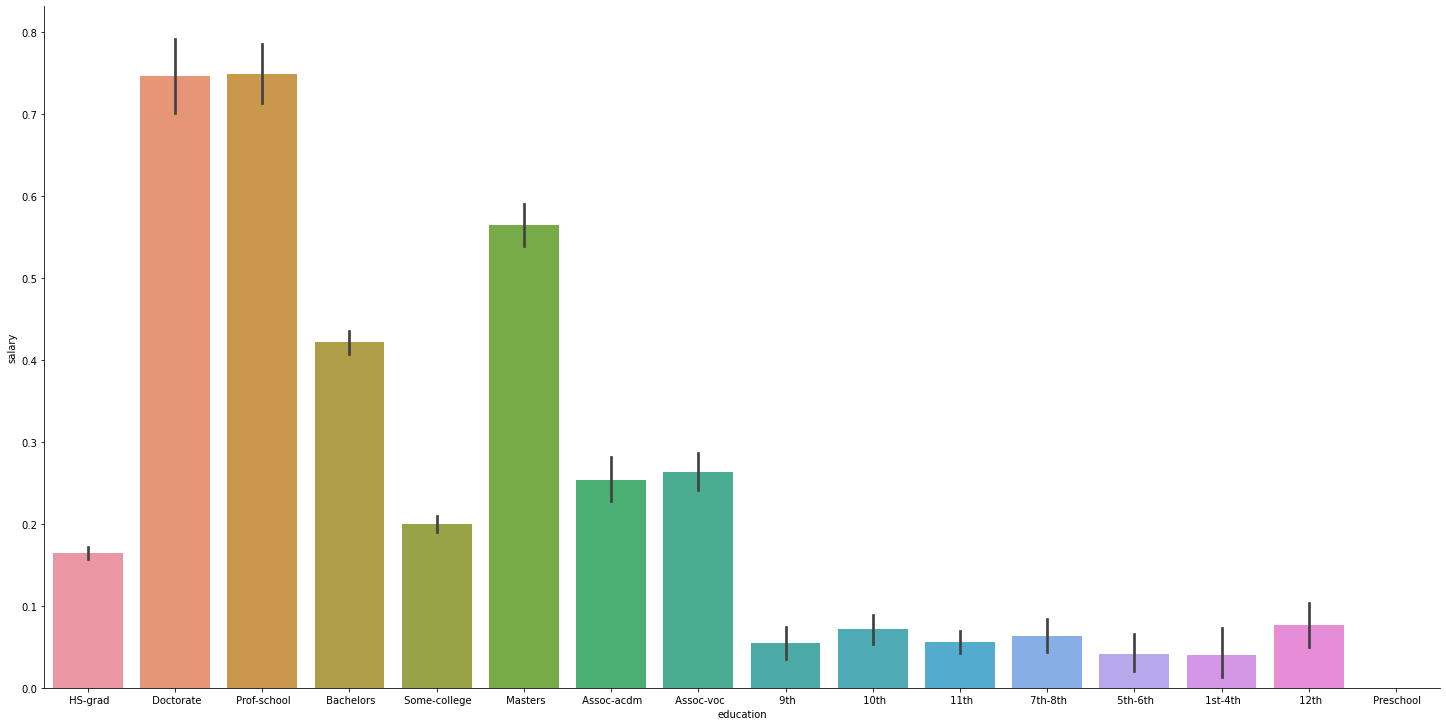

In [31]:
plt.figure(figsize=(50,30))
sns.catplot(x='education',y='salary', data=df.sort_values('salary', ascending=False), kind='bar', height=10 , aspect =2 )
plt.show()

In [32]:
#Values to be used in form for respective education level.
'''
education  = {' Bachelors':13, ' HS-grad':9, ' 11th':7, ' Masters':14, ' 9th':5,
       ' Some-college':10, ' Assoc-acdm':12, ' 7th-8th':4, ' Doctorate':16,
       ' Assoc-voc':11, ' Prof-school':15, ' 5th-6th':3, ' 10th':6, ' Preschool':1,
       ' 12th':8, ' 1st-4th':2}
       '''

"\neducation  = {' Bachelors':13, ' HS-grad':9, ' 11th':7, ' Masters':14, ' 9th':5,\n       ' Some-college':10, ' Assoc-acdm':12, ' 7th-8th':4, ' Doctorate':16,\n       ' Assoc-voc':11, ' Prof-school':15, ' 5th-6th':3, ' 10th':6, ' Preschool':1,\n       ' 12th':8, ' 1st-4th':2}\n       "

In [33]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,North-America,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,North-America,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,North-America,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,North-America,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,North-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,38,North-America,0
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,40,North-America,1
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,40,North-America,0
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,20,North-America,0


In [34]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,North-America,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,North-America,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,North-America,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,North-America,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,North-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,38,North-America,0
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,40,North-America,1
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,40,North-America,0
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,20,North-America,0


In [35]:
df_temp = df.drop(['age' , 'fnlwgt' , 'education-num' , 'sex' , 'hours-per-week' , 'salary'] , axis = 1)

In [36]:
df_temp

,workclass,education,marital-status,occupation,relationship,race,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,North-America
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,North-America
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,North-America
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,North-America
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,North-America
...,...,...,...,...,...,...,...
30157,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,North-America
30158,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,North-America
30159,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,North-America
30160,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,North-America


In [37]:
#Counting the frequency of each variable in the dataset
variable_count = dict()
for i in df_temp.columns:
    variable_count = df_temp[i].value_counts().to_dict()
    print(variable_count)
    df_temp[i] = df_temp[i].map(variable_count)

{' Private': 22286, ' Self-emp-not-inc': 2499, ' Local-gov': 2067, ' State-gov': 1279, ' Self-emp-inc': 1074, ' Federal-gov': 943, ' Without-pay': 14}
{' HS-grad': 9840, ' Some-college': 6678, ' Bachelors': 5044, ' Masters': 1627, ' Assoc-voc': 1307, ' 11th': 1048, ' Assoc-acdm': 1008, ' 10th': 820, ' 7th-8th': 557, ' Prof-school': 542, ' 9th': 455, ' 12th': 377, ' Doctorate': 375, ' 5th-6th': 288, ' 1st-4th': 151, ' Preschool': 45}
{' Married-civ-spouse': 14065, ' Never-married': 9726, ' Divorced': 4214, ' Separated': 939, ' Widowed': 827, ' Married-spouse-absent': 370, ' Married-AF-spouse': 21}
{' Prof-specialty': 4038, ' Craft-repair': 4030, ' Exec-managerial': 3992, ' Adm-clerical': 3721, ' Sales': 3584, ' Other-service': 3212, ' Machine-op-inspct': 1966, ' Transport-moving': 1572, ' Handlers-cleaners': 1350, ' Farming-fishing': 989, ' Tech-support': 912, ' Protective-serv': 644, ' Priv-house-serv': 143, ' Armed-Forces': 9}
{' Husband': 12463, ' Not-in-family': 7726, ' Own-child': 

In [38]:
df_temp

,workclass,education,marital-status,occupation,relationship,race,country
0,1279,5044,9726,3721,7726,25933,28833
1,2499,5044,14065,3992,12463,25933,28833
2,22286,9840,4214,1350,7726,25933,28833
3,22286,1048,14065,1350,12463,2817,28833
4,22286,5044,14065,4038,1406,2817,28833
...,...,...,...,...,...,...,...
30157,22286,1008,14065,912,1406,25933,28833
30158,22286,9840,14065,1966,12463,25933,28833
30159,22286,9840,827,3721,3212,25933,28833
30160,22286,9840,9726,3721,4466,25933,28833


In [39]:
df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'country'], axis=1, inplace=True)

In [40]:
df = pd.concat([df, df_temp], axis=1)

In [41]:
df

,age,fnlwgt,education-num,sex,hours-per-week,salary,workclass,education,marital-status,occupation,relationship,race,country
0,39,77516,13,0,40,0,1279,5044,9726,3721,7726,25933,28833
1,50,83311,13,0,13,0,2499,5044,14065,3992,12463,25933,28833
2,38,215646,9,0,40,0,22286,9840,4214,1350,7726,25933,28833
3,53,234721,7,0,40,0,22286,1048,14065,1350,12463,2817,28833
4,28,338409,13,1,40,0,22286,5044,14065,4038,1406,2817,28833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,257302,12,1,38,0,22286,1008,14065,912,1406,25933,28833
30158,40,154374,9,0,40,1,22286,9840,14065,1966,12463,25933,28833
30159,58,151910,9,1,40,0,22286,9840,827,3721,3212,25933,28833
30160,22,201490,9,0,20,0,22286,9840,9726,3721,4466,25933,28833


In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

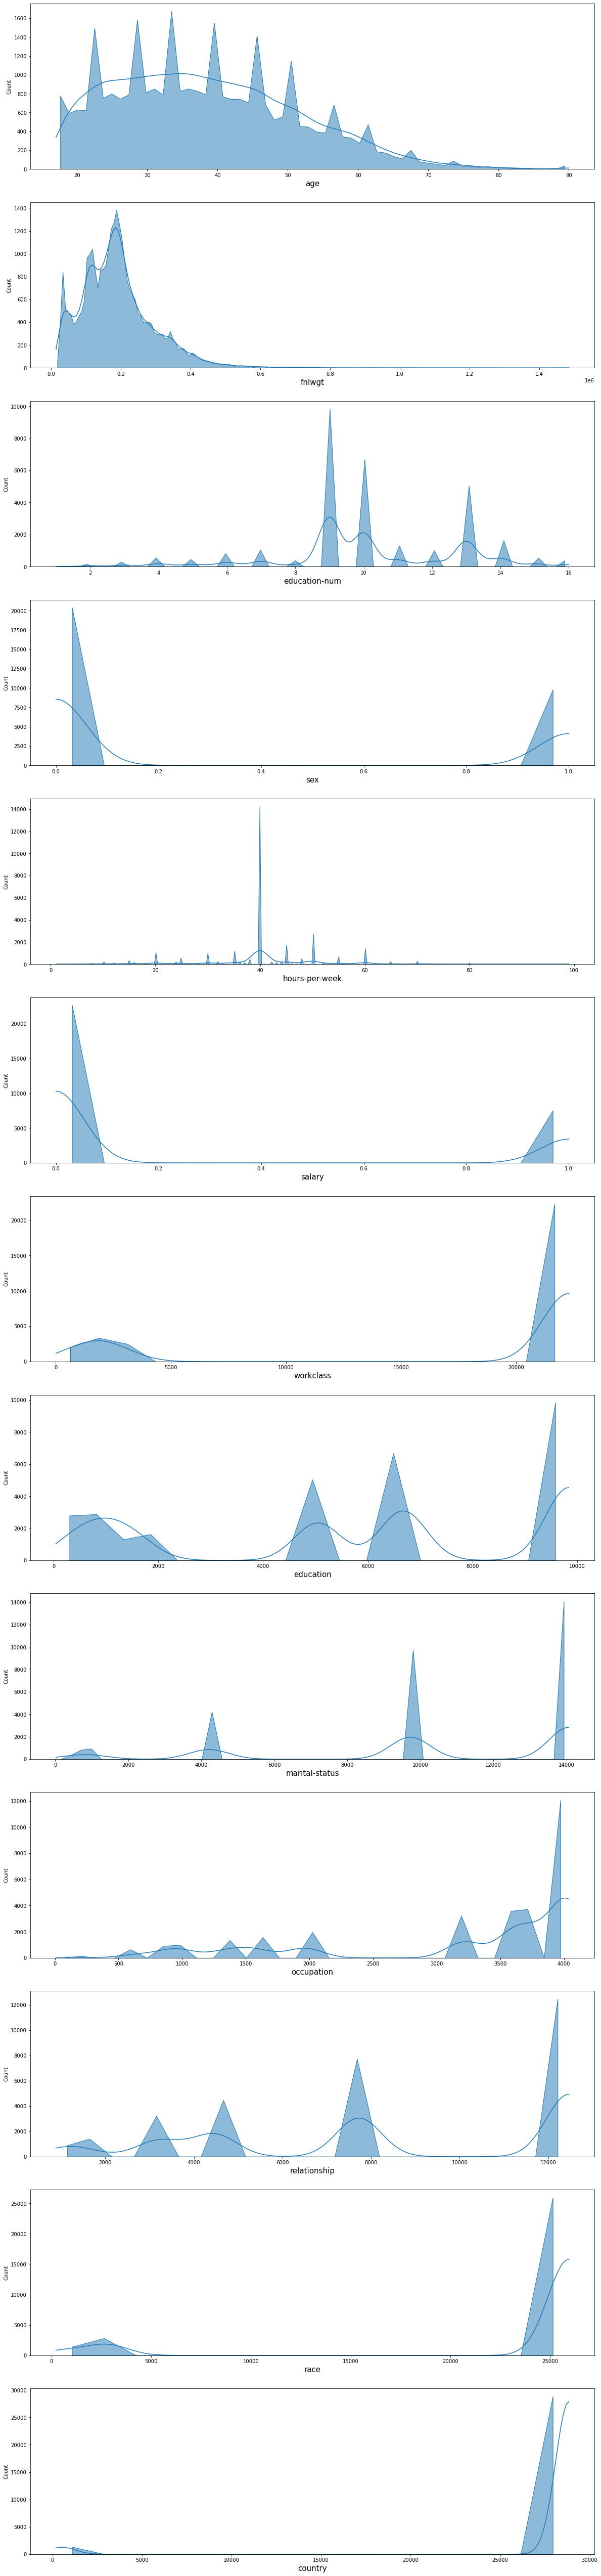

In [43]:
plt.figure(figsize=(20,100))
i = 1

for features in df.columns:
    if i <=14:
        ax = plt.subplot(14 ,1 , i)
        sns.histplot(df[features] , kde = True , element='poly')
        plt.xlabel(features , fontsize = 15)
    i+=1
plt.show()

The above histogram shows that the data is not normally distributed. The data normalization will be carried out in the further analysis of the data. Excluding the columns which has boolean values

C:\Users\AAKASH\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AAKASH\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AAKASH\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AAKASH\anacon

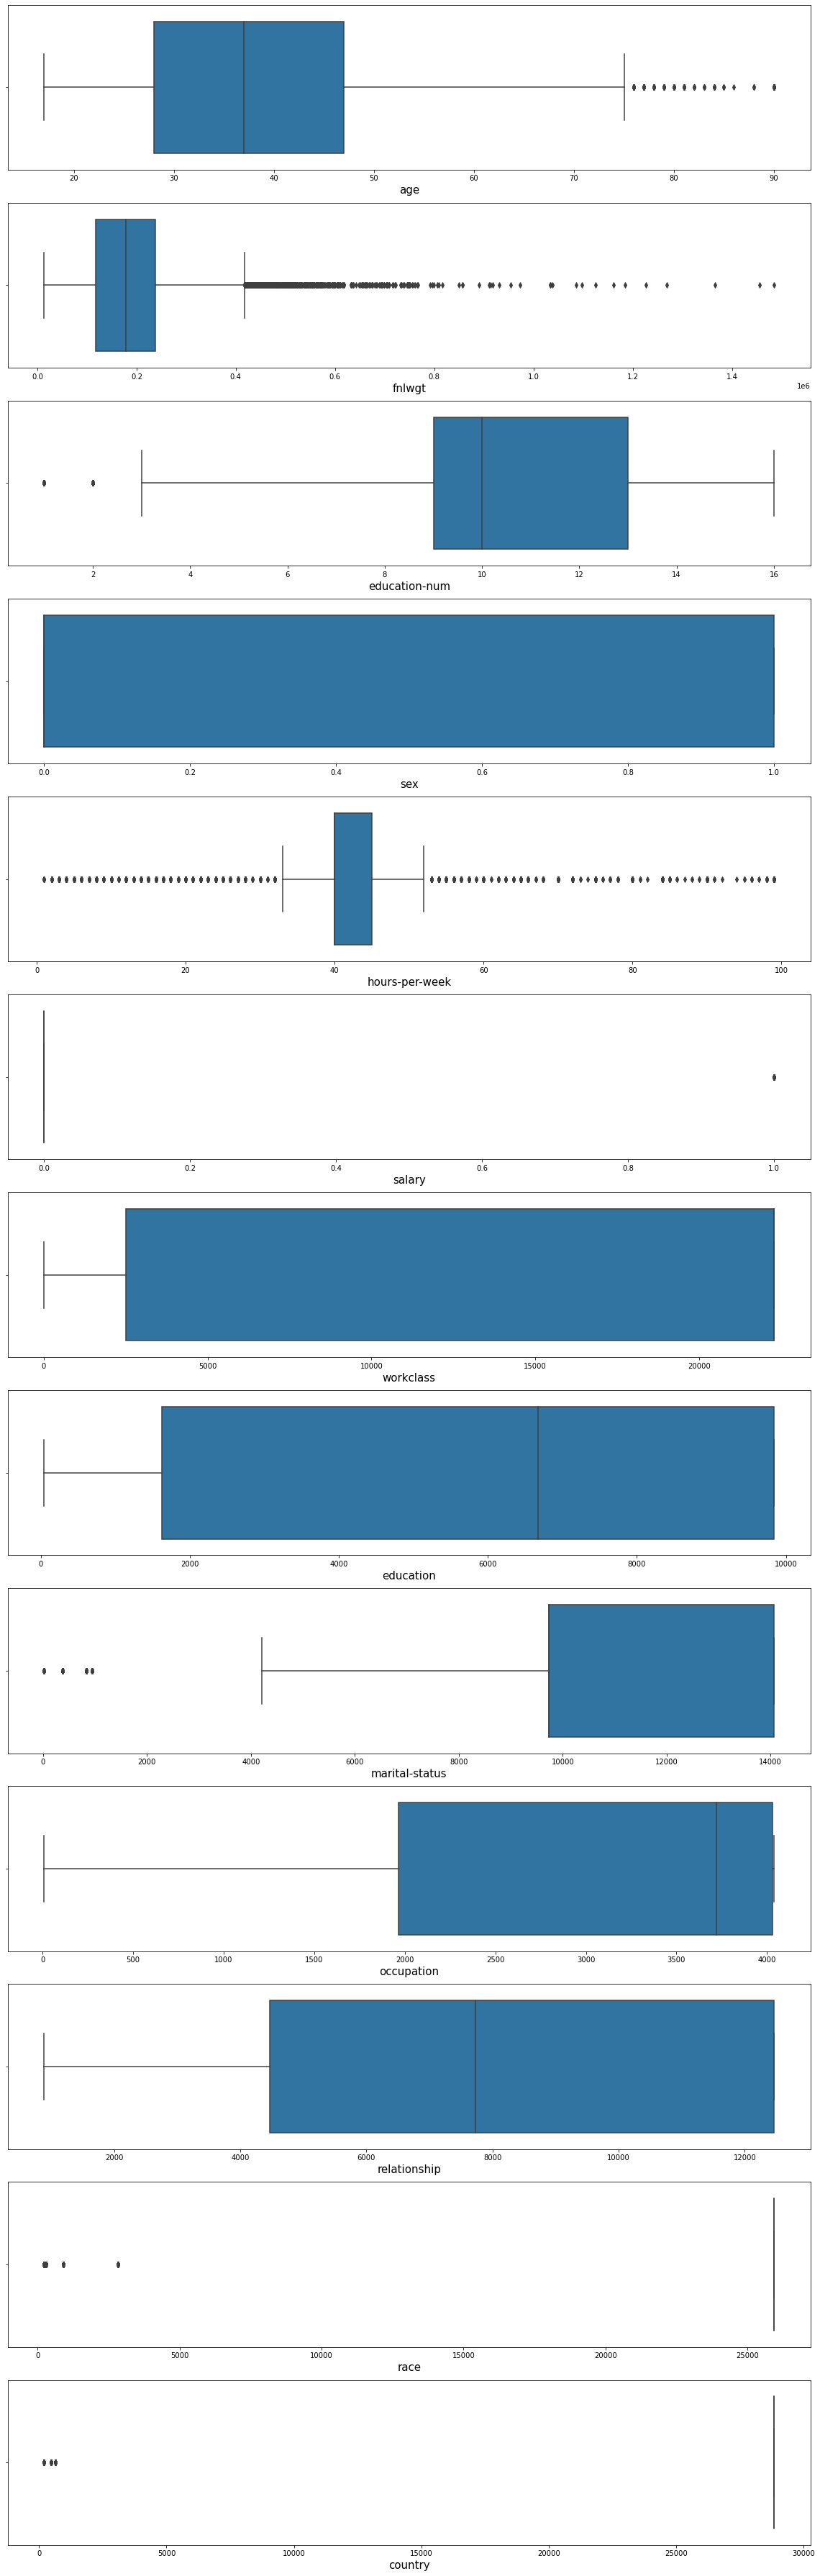

In [44]:
plt.figure(figsize=(20,70))
i = 1

for features in df.columns:
    if i <=14:
        ax = plt.subplot(14 ,1 , i)
        sns.boxplot(df[features])
        plt.xlabel(features , fontsize = 15)
    i+=1
plt.show()

Now as per the above box plots it can be seen that their are outliers in age , fnlwgt and hours per week column

In [45]:
Q1 = np.percentile(df['age'] , 25 , interpolation='midpoint')
Q3 = np.percentile(df['age'] , 75 , interpolation='midpoint')
IQR = Q3 - Q1
print(IQR)

upper = np.where(df['age'] >= (Q3+1.5*IQR))
lower = np.where(df['age'] <= (Q1-1.5*IQR))

df.drop(upper[0] , inplace=True)
df.drop(lower[0] , inplace=True)
print(df.shape)

19.0
(29993, 13)


<AxesSubplot:>

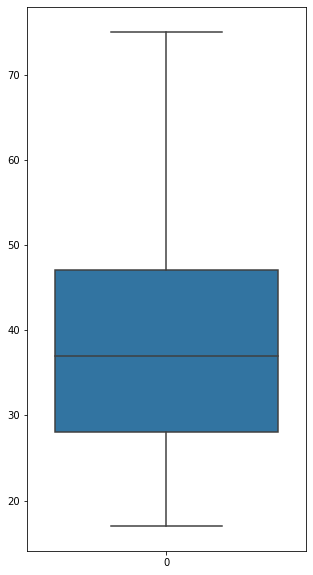

In [46]:
plt.figure(figsize =(5,10))
sns.boxplot(data = df['age'])

In [47]:
from scipy import stats


In [48]:
z = np.abs(stats.zscore(df['fnlwgt']))

In [49]:
print(z)

[1.06300815 1.0082089  0.24319039 ... 0.35951626 0.10932703 0.92670111]


In [50]:
df_fnlwgt_outliers = df['fnlwgt'][(z<3)]

In [51]:
df_fnlwgt_outliers.shape

(29674,)

<AxesSubplot:>

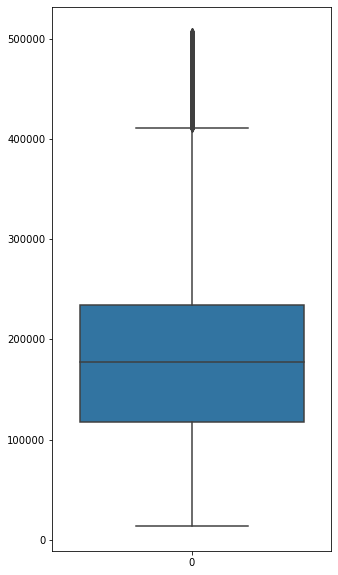

In [52]:
plt.figure(figsize =(5,10))
sns.boxplot(data = df_fnlwgt_outliers)

In [53]:
df.drop(['fnlwgt'] , axis=1 , inplace=True)

In [54]:
df = pd.concat([df , df_fnlwgt_outliers] , axis=1)

In [55]:
df

,age,education-num,sex,hours-per-week,salary,workclass,education,marital-status,occupation,relationship,race,country,fnlwgt
0,39,13,0,40,0,1279,5044,9726,3721,7726,25933,28833,77516.0
1,50,13,0,13,0,2499,5044,14065,3992,12463,25933,28833,83311.0
2,38,9,0,40,0,22286,9840,4214,1350,7726,25933,28833,215646.0
3,53,7,0,40,0,22286,1048,14065,1350,12463,2817,28833,234721.0
4,28,13,1,40,0,22286,5044,14065,4038,1406,2817,28833,338409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,12,1,38,0,22286,1008,14065,912,1406,25933,28833,257302.0
30158,40,9,0,40,1,22286,9840,14065,1966,12463,25933,28833,154374.0
30159,58,9,1,40,0,22286,9840,827,3721,3212,25933,28833,151910.0
30160,22,9,0,20,0,22286,9840,9726,3721,4466,25933,28833,201490.0


In [57]:
df.to_csv("OutliersRemoved.csv" , index = False)